<a href="https://colab.research.google.com/github/HYUNMIN-HWANG/AI_STUDY/blob/master/%EB%B9%B5%ED%98%95%EC%9D%98_%EA%B0%9C%EB%B0%9C%EB%8F%84%EC%83%81%EA%B5%AD_MusicGenre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 빵형의 개발도상국 : 음악 장르 분류 인공지능과 음악 추천 알고리즘 만들기

코드 :
https://colab.research.google.com/drive/1pC4pJHAIA8e0zdD02kFXu7fngrMguOnx?usp=sharing#scrollTo=ZEXl1ORpN83s

원본 영상 :
https://www.youtube.com/watch?v=IE6lue0qusQ


## 오디오 파일 이해하기

* y : 소리가 떨리는 세기(진폭)를 시간 순서대로 나열한 것 ==> 픽셀의 값 RGB
* sr : 1초 당 들리는 샘플의 개수를 단위로 나타낸 것, 단위 Hz 또는 kHz  ==> 음질 정도를 결정해준다.
    * 최고 음역대 : 22.05kHz(=22,050Hz)
    * 인간의 가청주파수대역 : 20Hz ~ 20kHz



In [18]:
import librosa

y, sr = librosa.load("/content/dataset_DanceStudio_sub100112a00252.wav")


print(y)        
print(sr)       
print(len(y))      
print("Sampling rate (KHz) : %d" % sr)                  
print("Audio length (seconds) : %.2f" % (len(y) / sr))  

[-0.00264217 -0.00313744 -0.00271324 ... -0.00190691 -0.00148459
  0.        ]
22050
222497
Sampling rate (KHz) : 22050
Audio length (seconds) : 10.09


# 음악 들어보기


*   ipython.display audio : 오디오 파일을 재생시킴





In [19]:
import IPython.display as ipd
ipd.Audio(y, rate=sr)

#  2D 음파 그래프

librosa.display.waveplot(y=y, sr=sr)
* y : 시간 순서대로 나열된 오디오 파일
* sr : samplig rate

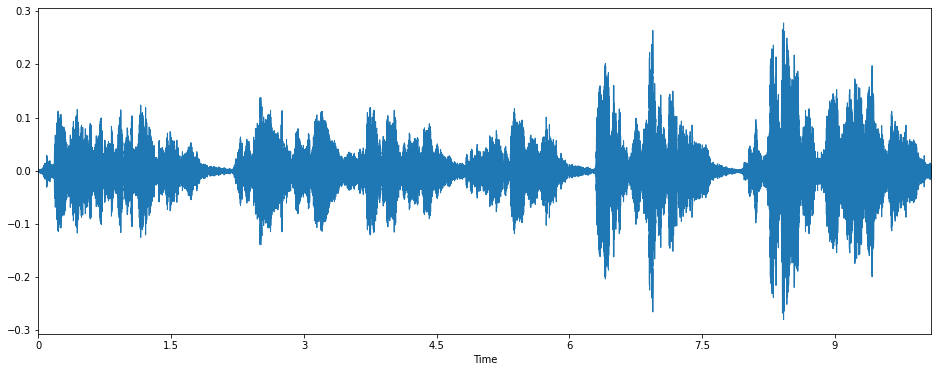

In [20]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(16,6))
librosa.display.waveplot(y=y, sr=sr)
plt.show()

# 가로 : 시간
# 세로 : 오디오의 세기

# Fourier Transform(FT)
**푸리에 변환** : 
* 임의의 입력 신호를 다양한 주파수를 갖는 주기함수들의 합으로 분해하여 표현하는 것 
* 시간 영역 데이터를 주파수 영역으로 변경해준다.
* 특정 시간 길이의 음성 조각(프레임)이 각각의 주파수 성분들을 얼마만큼 갖고 있는지를 의미하는 스펙트럼을 얻을 수 있다.
* 인풋 : 전파, 음성 신호 등과 같이 시간축에 대해 정의된 신호 혹은 이미지 등과 같이 공간축에 대해 정의된 신호일 수 있다.
* 장점 : 입력 신호가 어떤 신호이든지 관계없이 임의의 입력 신호를 sin, cos 주기함수들의 합으로 항상 분해할 수 있다.
    * y축 : 주파수, 로그 스케일
    * 컬러축 : 데시벨

**STFT(Short Time Fourier Transform)**
* 푸리에 변환을 시킨 전체 파형은 제대로된 주파수 분석을 할 수 없기 때문에, 짧은 시간 단위로 분리해서 각각의 구간에 대해 변환을 한다.


(1025, 435)


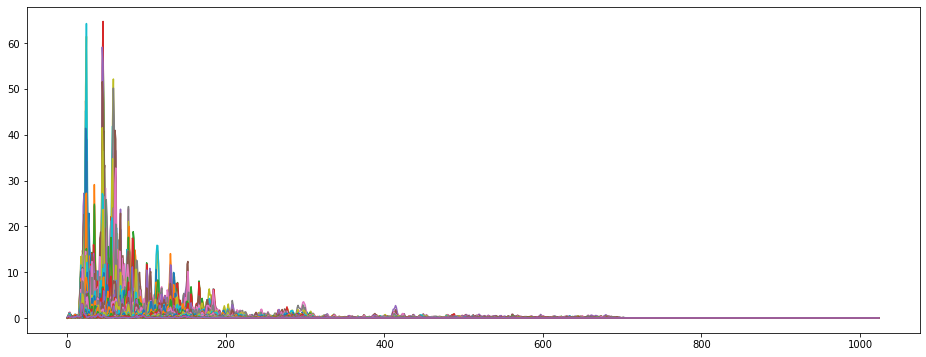

In [21]:
import numpy as np

D = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))
# n_fft : 윈도우 사이즈

print(D.shape)  # (1025, 435)

plt.figure(figsize=(16,6))
plt.plot(D)
plt.show()

## Spectogram
* 시간에 따른 신호 주파수의 스펙트럼 그래프
* stft로 시간 간격으로 쪼갠 뒤 푸리에 변환을 진행하면 해당 주기만큼 주파수 분석 그래프를 얻을 수 있다.
* output : 칼라맵이 생성된다.

주요 파라미터
* win_length : FFT를 할 때 참조할 그래프의 길이, FFT를 수행할 시간
* hop_length : 얼마만큼 시간 주기를 이동하면서 분석을 할 것인지, 칼라맵의 시간 주기, 시간 해상도
* n_fft - window : 
    * FFT : Fast Fourier Transform, 빠르게 변환하는 방식
    * n_fft가 win_length 보다 길 경우 zero_padding 해서 처리하기 위한 파라미터
    * default : win_length와 동일하다.

* 분석하는 시간이 길수록 주파수를 더 잘 분석한다. 대신, 시간이 길어지는 만큼 시간 해상도가 떨어진다.


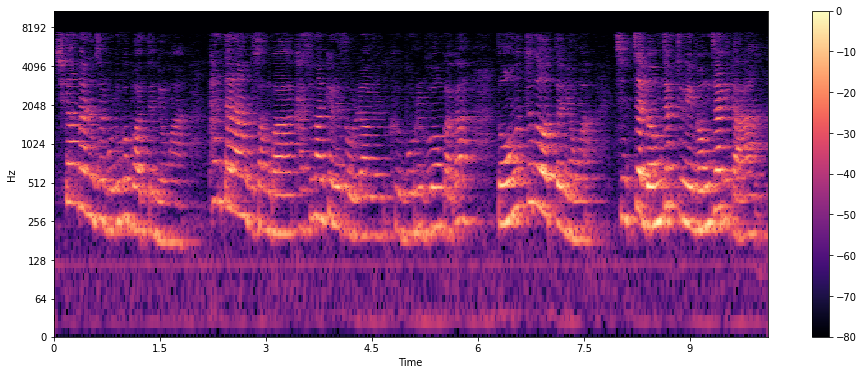

In [22]:
DB = librosa.amplitude_to_db(D, ref=np.max)
# amplitude_to_db : amplitude를 데시벨로 바꿔라

plt.figure(figsize=(16,6))
librosa.display.specshow(DB, sr=sr, hop_length=512, x_axis='time', y_axis='log')
# librosa.display.specshow : Spectogram을 보기 위해서 쓰는 것
# x 축 : time
# y 축 : 로그 스케일

plt.colorbar()
plt.show()

# 단점 : 보기 힘들다.

# Mel Spectogram
https://newsight.tistory.com/294

* Spectogram의 y축을 Mel Scale(로그 스케일)로 변환한 것 
* 인간이 보기 쉬운 형태로 변환해준다.
* 사람의 귀를 칼라맵인 스펙트로그램에 반영하는 것
* 고주파로 갈수록 사람이 구분하는 주파수 간격이 넓어진다.




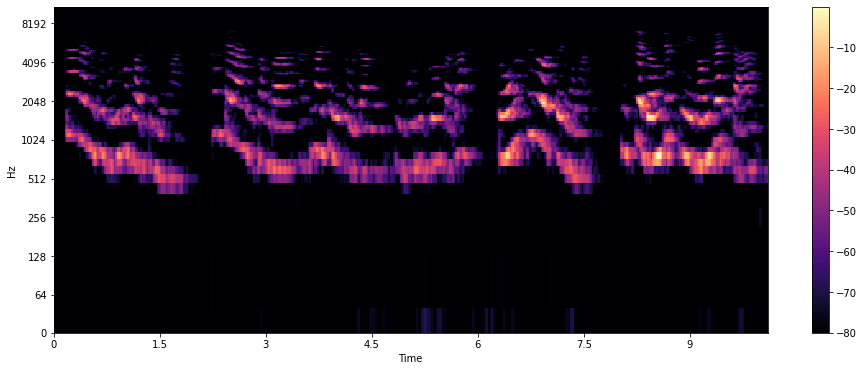

In [23]:
S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(16,6))
librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

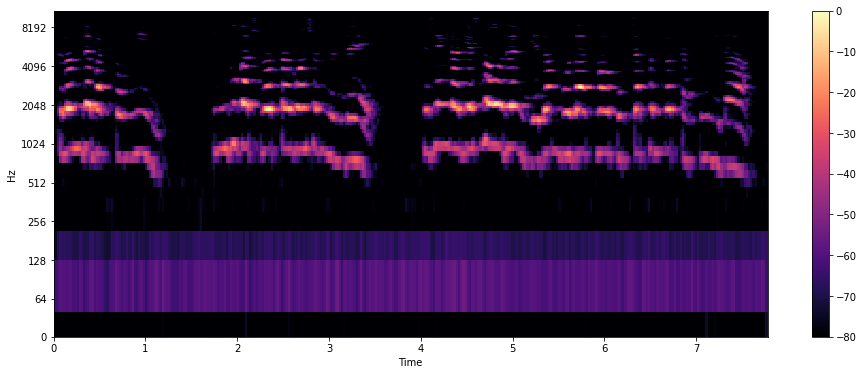

In [24]:
# 여성 목소리(위) vs 어린 남자 아이 목소리(아래)
# 목소리 마다 Mel Spectogram의 형태가 다르다. 

y2, sr2 = librosa.load('/content/dataset_AirbnbStudio_sub100101a00051.wav')
y2, _ = librosa.effects.trim(y2)

S2 = librosa.feature.melspectrogram(y2, sr=sr2)
S_DB2 = librosa.amplitude_to_db(S2, ref=np.max)

plt.figure(figsize=(16,6))
librosa.display.specshow(S_DB2, sr=sr2, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

## 오디오 특성 추출

## Tempo(BPM)

In [17]:
# Tempo (BPM)
tempo, _ = librosa.beat.beat_track(y, sr=sr)
print(tempo)    # 83.35433467741936

83.35433467741936


In [25]:
# Zero Crossing Rate
# 음파가 양에서 음으로 또는 음에서 양으로 바뀌는 비율

zero_crossings = librosa.zero_crossings(y, pad=False)

print(zero_crossings)   # [False False False ... False False  True]
print(sum(zero_crossings))  # 14395

[False False False ... False False  True]
14395


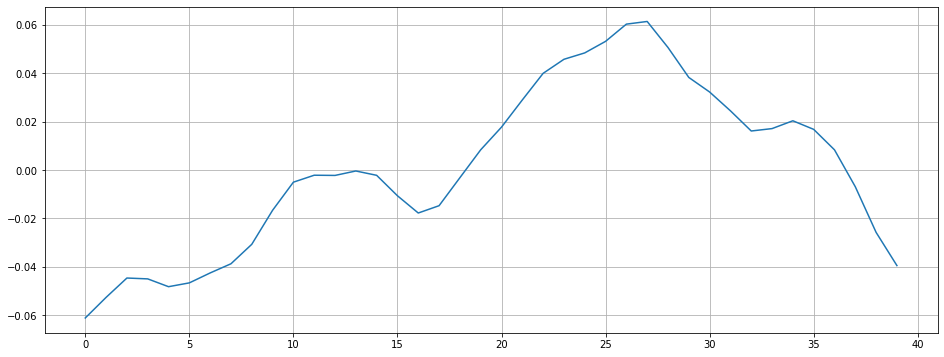

In [26]:
# Zero Crossing Rate를 확인하기 위해서 확대해서 본다.

n0 = 9000
n1 = 9040

plt.figure(figsize=(16,6))
plt.plot(y[n0:n1])
plt.grid()
plt.show()

In [27]:
# Zero Crossing Rate : 위 그래프가 000을 몇 번 지나쳤냐
zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
print(sum(zero_crossings))

2


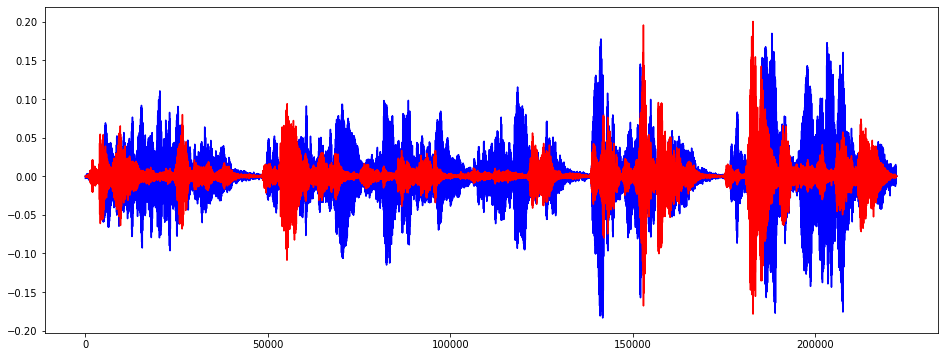

In [29]:
# Harmonic and Percussive Components
# Harmonics : 사람의 귀로 구분할 수 없는 특징들 (음악의 색깔)
# Percussives : 리듬과 감정을 나타내는 충격파

y_harm, y_perc = librosa.effects.hpss(y)

plt.figure(figsize=(16,6))
plt.plot(y_harm, color='b') # blue
plt.plot(y_perc, color='r') # red
plt.show()

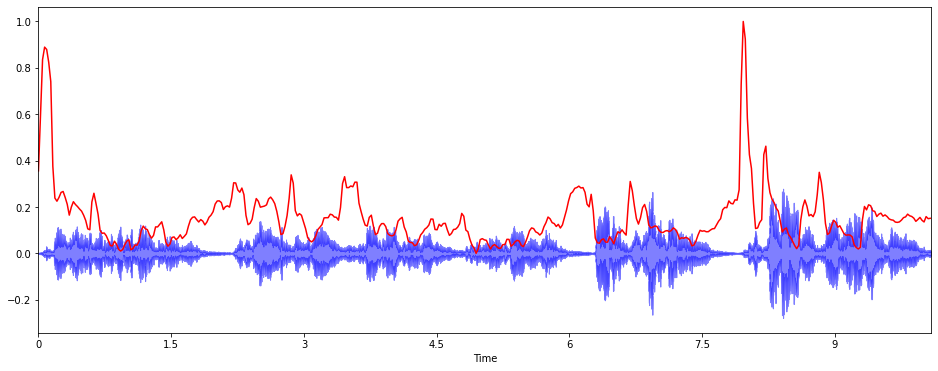

In [34]:
# Spectral Centroid
# 소리의 무게 중심이 어딘지를 알려주는 지표

# 프레임 단위별로 나누어져 있다. 초로 나누어서 봐야 한다.
# Computing the time variable for visualization
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

import sklearn
def normalize(x, axis=0) : 
    return sklearn.preprocessing.minmax_scale(x, axis=axis) # 전처리 Minmaxsclaer

plt.figure(figsize=(16, 6))
librosa.display.waveplot(y, sr=sr, alpha=0.5, color='b')    # 원래의 소리 (blue)
plt.plot(t, normalize(spectral_centroids), color='r')       # 전처리한 소리 (red)
plt.show()

# 가로 : 시간
# 세로 : 음파
# 높은 부분이 무게중심이다.

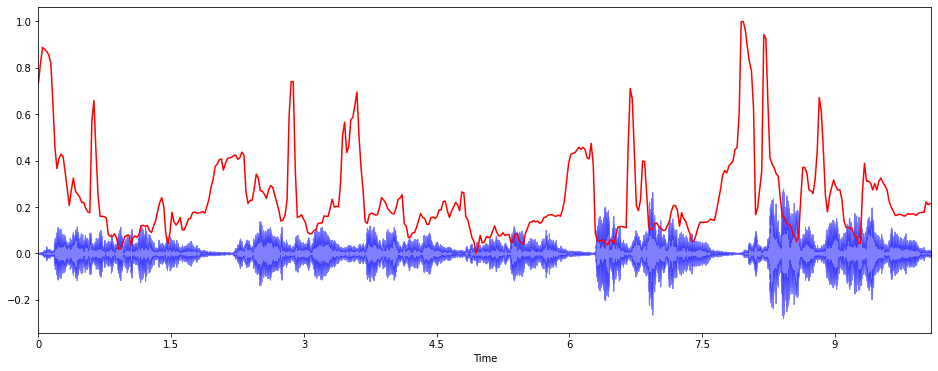

In [35]:
# Spectral Rolloff
# 신호 모양을 측정한다.
# 총 스펙트럼 에너지 중 낮은 주파수(85% 이하)에 얼마나 많이 집중되어 있는가

spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)[0]

plt.figure(figsize=(16, 6))
librosa.display.waveplot(y, sr=sr, alpha=0.5, color='b')
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.show()

## MFCCs (Mel-Frequency Cepstral Coefficients)

* MFCCs는 특징들의 작은 집합(약 10-20)으로 스펙트럼 포곡선의 전체적인 모양을 축약하여 보여준다.
* 사람의 청각 구조를 반영하여 음성 정보를 추출함

https://tech.kakaoenterprise.com/66

mean : 0.49
val : 0.04


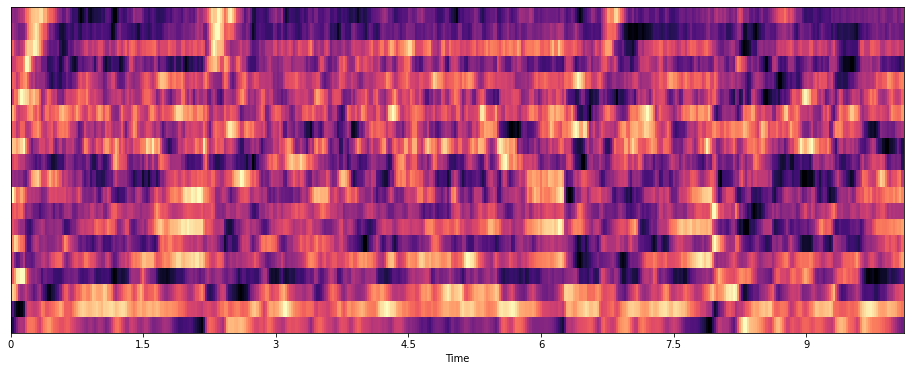

In [36]:
mfccs = librosa.feature.mfcc(y, sr=sr)
mfccs = normalize(mfccs, axis=1)

print('mean : %.2f' % mfccs.mean())
print("val : %.2f" % mfccs.var())

plt.figure(figsize=(16,6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.show()

## Chroma Frequencies
* 크로마 특징은 음악의 흥미롭고 강렬한 표현이다
* 크로마는 인간 청각이 옥타브 차이가 나는 주파수를 가진 두 음을 유사음으로 인지한다는 음악이론에 기반한다
* 모든 스펙트럼을 12개의 Bin으로 표현한다
* 12개의 Bin은 옥타브에서 12개의 각기 다른 반음(Semitones=Chroma)을 의미한다


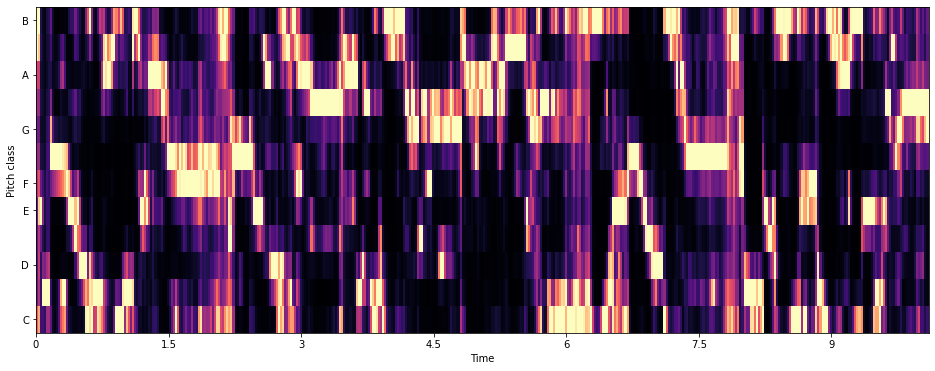

In [38]:
chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=512)

plt.figure(figsize=(16,6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512)
plt.show()